In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [4]:
from google.colab import drive
drive.mount('/content/drive')
file = '/content/drive/MyDrive/restaurant_recommendation_dataset (1).xlsx'

Mounted at /content/drive


In [5]:
Restraunt = pd.read_excel(file)
Restraunt.head()


,user_id,restaurant_id,restaurant_name,cuisine_type,rating,order_amount,popularity_score,user_age,delivery_time,previous_orders,discount_applied
0,15796,1174,Golden Dragon Chinese,Chinese,3.0,50.81,0.373,43.2,29.70,9,22.64
1,861,1928,Seafood Shack,Seafood,3.8,21.77,0.824,24.2,43.14,15,18.56
2,38159,1349,Mediterranean Delights,Mediterranean,3.2,72.21,0.528,31.5,27.75,10,34.92
3,44733,3708,Biryani Point,Indian,5.0,31.99,0.895,26.6,36.97,9,11.46
4,11285,3361,Grill House BBQ,BBQ,3.6,15.09,0.711,33.5,28.43,8,18.12


In [6]:
# Drop duplicate rows if any
Restraunt = Restraunt.fillna(0)
print("\nDuplicates Removed. Current shape:", Restraunt.shape)



Duplicates Removed. Current shape: (100000, 11)


In [7]:
# Check for missing values
print("Missing Values:\n", Restraunt.isnull().sum())

Missing Values:
 user_id             0
restaurant_id       0
restaurant_name     0
cuisine_type        0
rating              0
order_amount        0
popularity_score    0
user_age            0
delivery_time       0
previous_orders     0
discount_applied    0
dtype: int64


In [8]:
# Summary statistics
display(Restraunt.describe())

,user_id,restaurant_id,rating,order_amount,popularity_score,user_age,delivery_time,previous_orders,discount_applied
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,2505.567050,3.745231,52.494254,0.597508,30.570822,30.288484,9.996830,20.044960
std,14406.960108,1442.137166,0.899857,27.419559,0.196338,9.058529,9.415634,3.160763,11.524116
min,1.000000,1.000000,1.000000,5.000000,0.000000,18.000000,15.000000,0.000000,0.000000
25%,12487.750000,1256.000000,3.100000,28.690000,0.464000,23.200000,23.270000,8.000000,10.070000
50%,24793.500000,2513.000000,3.800000,52.530000,0.600000,30.000000,30.000000,10.000000,20.110000
75%,37382.250000,3752.000000,4.500000,76.260000,0.735000,36.800000,36.720000,12.000000,30.040000
max,49999.000000,4999.000000,5.000000,100.000000,1.000000,70.000000,60.000000,25.000000,40.000000


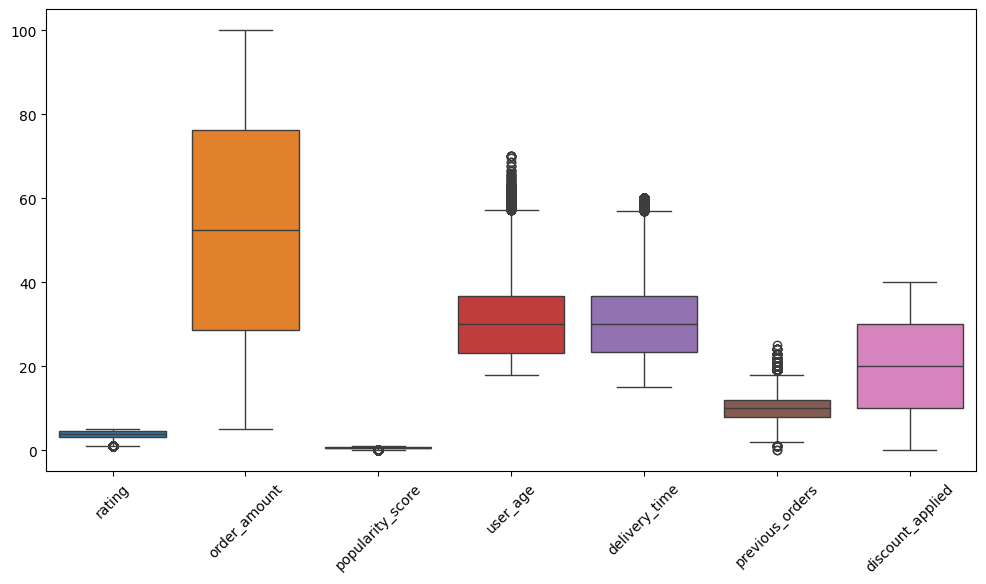

In [9]:
# Outlier detection using boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=Restraunt[['rating', 'order_amount', 'popularity_score', 'user_age', 'delivery_time', 'previous_orders', 'discount_applied']])
plt.xticks(rotation=45)
plt.show()



In [10]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Restraunt['restaurant_name'] = le.fit_transform(Restraunt['restaurant_name'])
Restraunt['cuisine_type'] = le.fit_transform(Restraunt['cuisine_type'])

In [11]:
# Normalizing numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['order_amount', 'popularity_score', 'delivery_time', 'discount_applied']
Restraunt[numerical_cols] = scaler.fit_transform(Restraunt[numerical_cols])

In [12]:
# Display processed data
display(Restraunt.head())

,user_id,restaurant_id,restaurant_name,cuisine_type,rating,order_amount,popularity_score,user_age,delivery_time,previous_orders,discount_applied
0,15796,1174,5,2,3.0,0.482211,0.373,43.2,0.326667,9,0.5660
1,861,1928,13,13,3.8,0.176526,0.824,24.2,0.625333,15,0.4640
2,38159,1349,9,11,3.2,0.707474,0.528,31.5,0.283333,10,0.8730
3,44733,3708,1,7,5.0,0.284105,0.895,26.6,0.488222,9,0.2865
4,11285,3361,6,1,3.6,0.106211,0.711,33.5,0.298444,8,0.4530


In [13]:
# Save cleaned dataset
Restraunt.to_csv('cleaned_restaurant_data.csv', index=False)
print("Cleaned")

Cleaned


In [14]:
# Define independent variables (features)
X = Restraunt[['rating']]  # Selecting the two main features

# Define dependent variable (target)
y = Restraunt['popularity_score']  # The weighted popularity rating score

# Split dataset into training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(len(y), len(y_pred))

100000 20000


In [15]:
Restraunt.corr()

,user_id,restaurant_id,restaurant_name,cuisine_type,rating,order_amount,popularity_score,user_age,delivery_time,previous_orders,discount_applied
user_id,1.000000,-0.004665,-0.000769,0.001077,-0.001893,0.004174,-0.003917,0.000571,-0.001048,0.001886,-0.000312
restaurant_id,-0.004665,1.000000,0.001613,0.004413,0.000022,-0.003305,0.000675,0.000504,-0.003885,-0.000813,0.001179
restaurant_name,-0.000769,0.001613,1.000000,0.310517,0.000638,0.004481,0.002694,-0.002327,-0.000799,-0.003608,-0.006476
cuisine_type,0.001077,0.004413,0.310517,1.000000,0.001768,0.000235,0.000767,-0.001664,-0.001590,-0.004779,-0.000604
rating,-0.001893,0.000022,0.000638,0.001768,1.000000,-0.001082,-0.000721,0.001018,0.003270,0.005748,-0.001960
order_amount,0.004174,-0.003305,0.004481,0.000235,-0.001082,1.000000,-0.000366,0.000441,0.005776,-0.000942,-0.002573
popularity_score,-0.003917,0.000675,0.002694,0.000767,-0.000721,-0.000366,1.000000,0.003035,0.003071,-0.003529,0.001400
user_age,0.000571,0.000504,-0.002327,-0.001664,0.001018,0.000441,0.003035,1.000000,0.004333,-0.000186,0.003982
delivery_time,-0.001048,-0.003885,-0.000799,-0.001590,0.003270,0.005776,0.003071,0.004333,1.000000,-0.001360,0.008542
previous_orders,0.001886,-0.000813,-0.003608,-0.004779,0.005748,-0.000942,-0.003529,-0.000186,-0.001360,1.000000,-0.000438


In [16]:
import statsmodels.formula.api as smf

model = smf.ols('popularity_score ~ rating + popularity_score', data=Restraunt).fit()
(model.rsquared, model.rsquared_adj)


(1.0, 1.0)

20000 20000


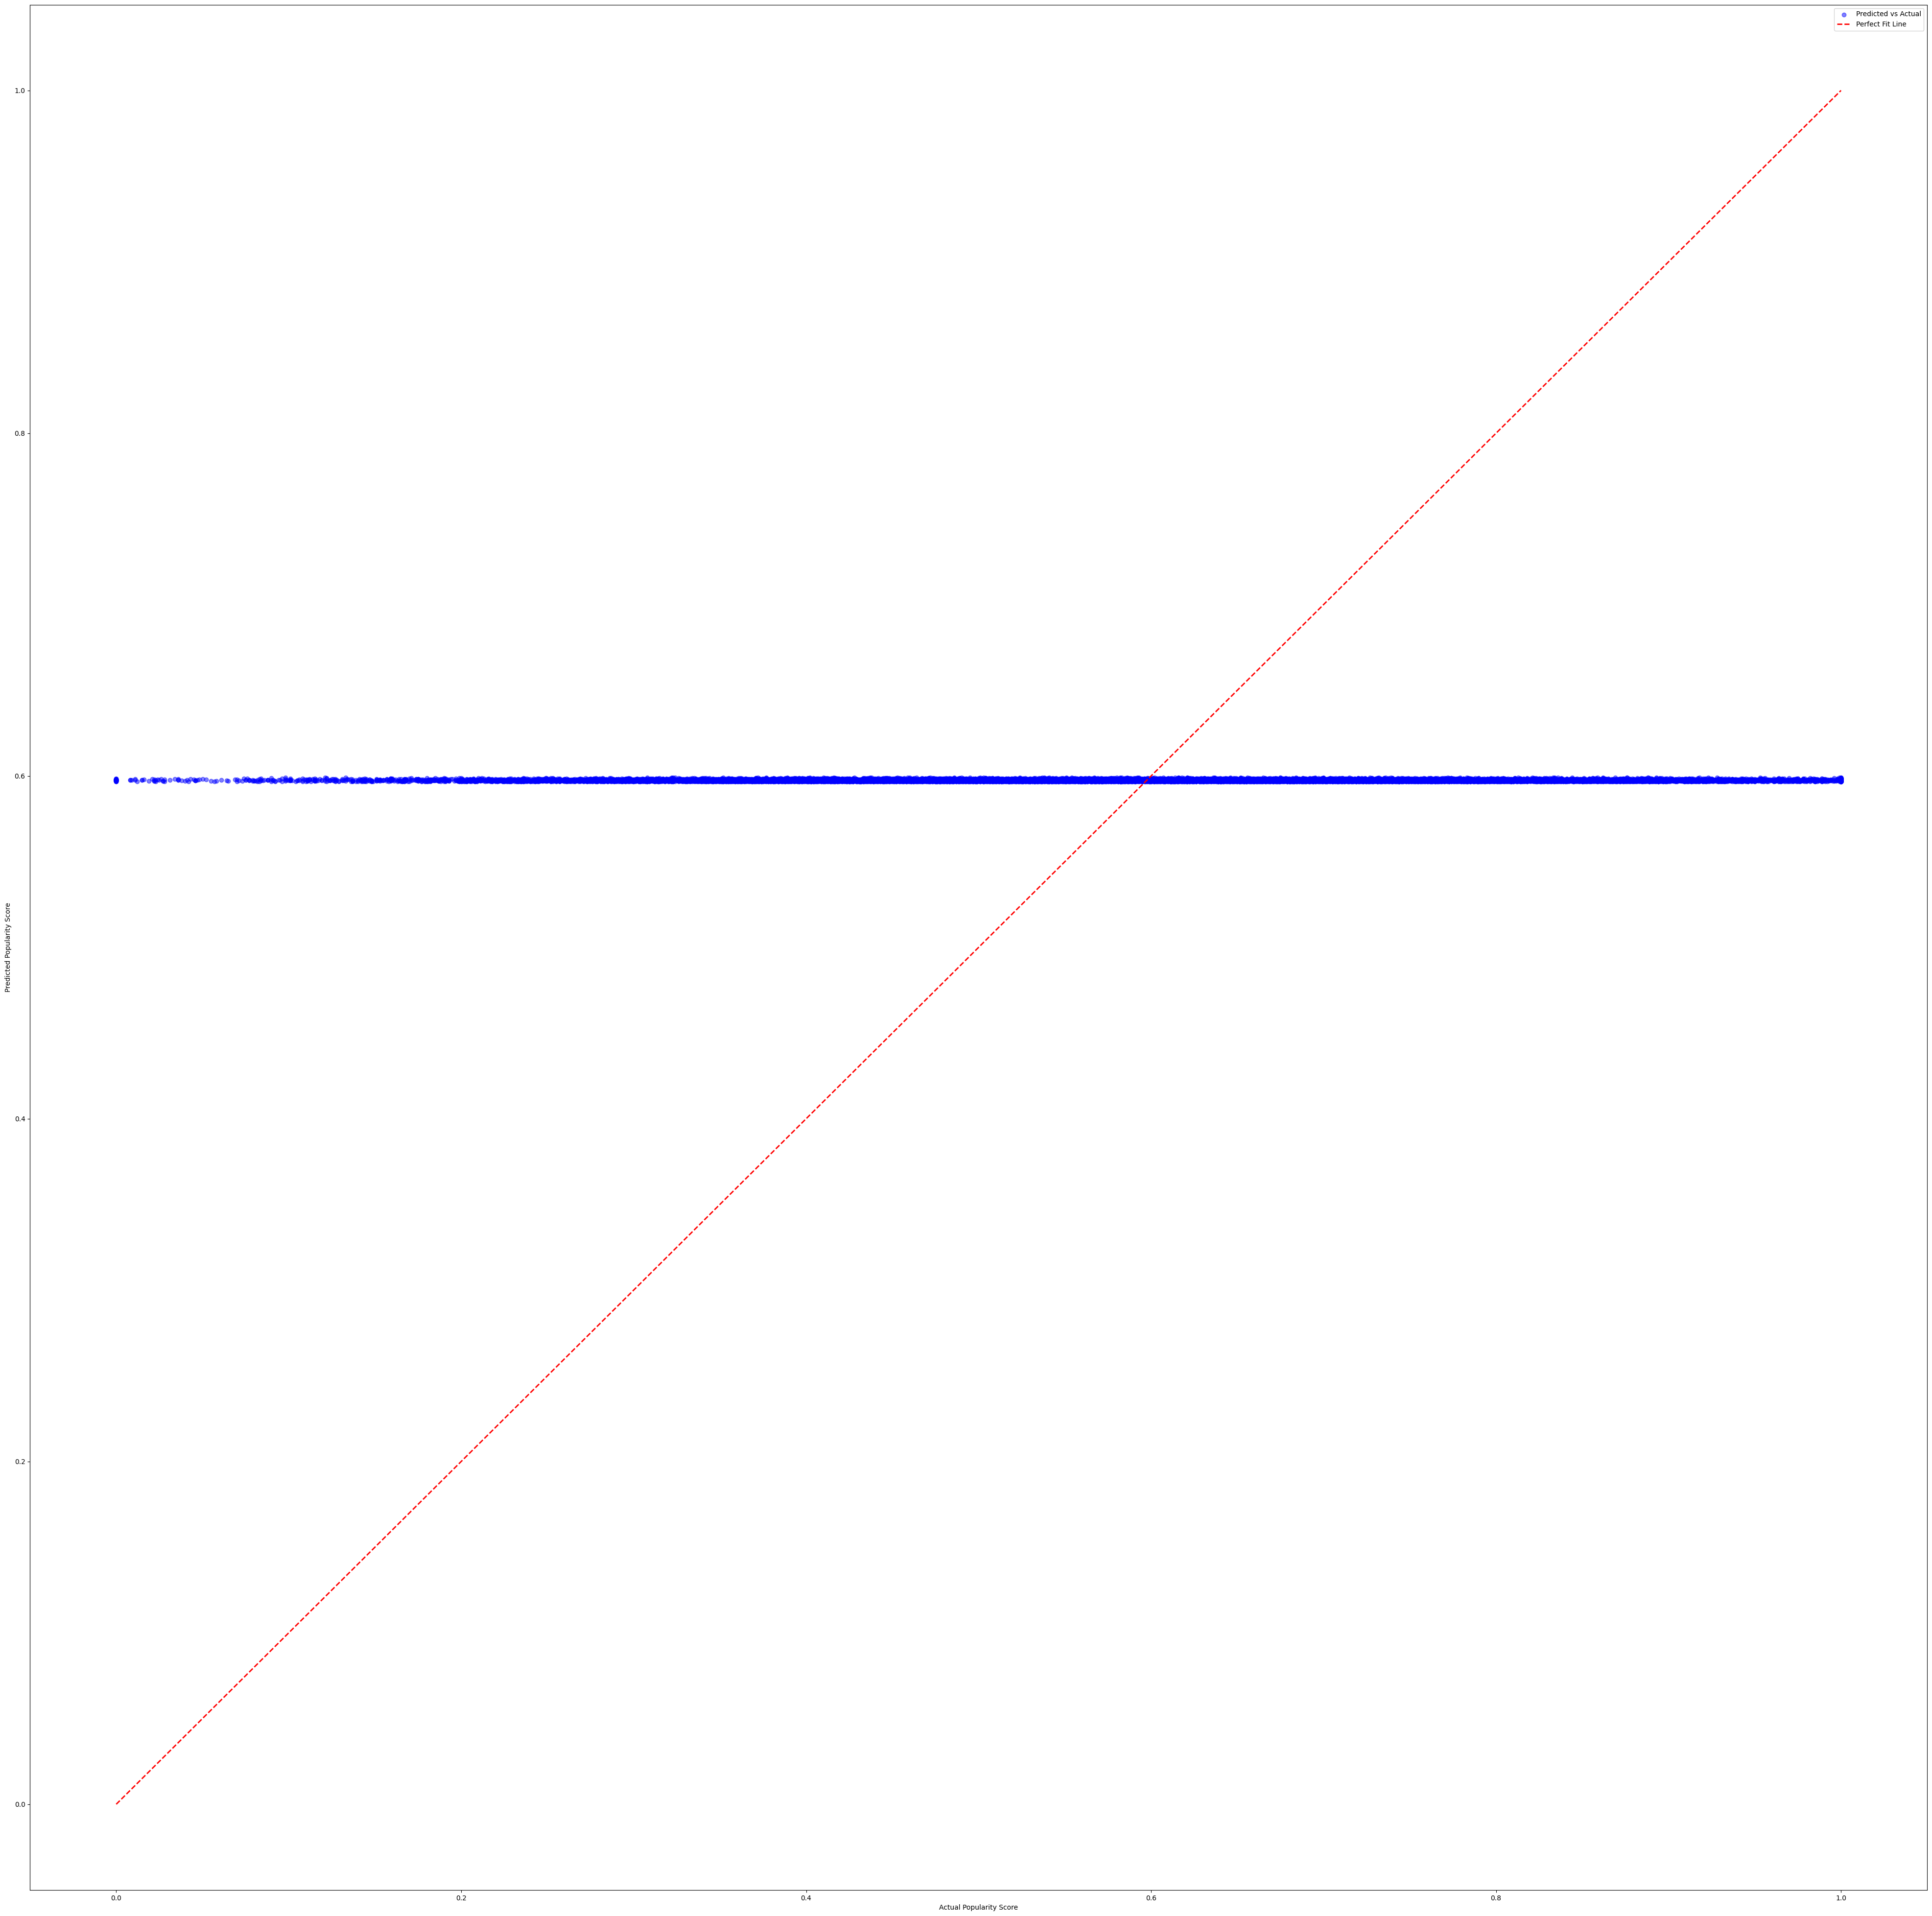

In [23]:
import matplotlib.pyplot as plt

# Ensure x and y are the same size
print(len(y_test), len(y_pred))  # Debugging step

plt.figure(figsize=(50,50))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', linewidth=2, label='Perfect Fit Line')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.legend()
plt.show()
